In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("../Datasets/Bank.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


## DATA PREPARATION

### Que:Handling Missing Values and Data Type Validation

In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

## EXPLORATORY DATA ANALYSIS 

### Que:Understand the Data Distribution

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
df.job.value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [7]:
df.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [8]:
df.education.value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [9]:
df.default.value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [10]:
df.housing.value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [11]:
df.loan.value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [12]:
df.contact.value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [13]:
df.month.value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [14]:
df.day_of_week.value_counts()

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

### Que:Visualize Customer Profiles

In [15]:
a=df.groupby('job')['y'].value_counts(normalize=True).unstack()
a

y,0,1
job,,
admin.,0.870274,0.129726
blue-collar,0.931057,0.068943
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747674,0.252326
self-employed,0.895144,0.104856
services,0.918619,0.081381
student,0.685714,0.314286


In [16]:
b=df.groupby('education')['y'].value_counts(normalize=True).unstack()
b

y,0,1
education,,
basic.4y,0.897510,0.102490
basic.6y,0.917976,0.082024
basic.9y,0.921754,0.078246
high.school,0.891645,0.108355
illiterate,0.777778,0.222222
professional.course,0.886515,0.113485
university.degree,0.862755,0.137245
unknown,0.854997,0.145003


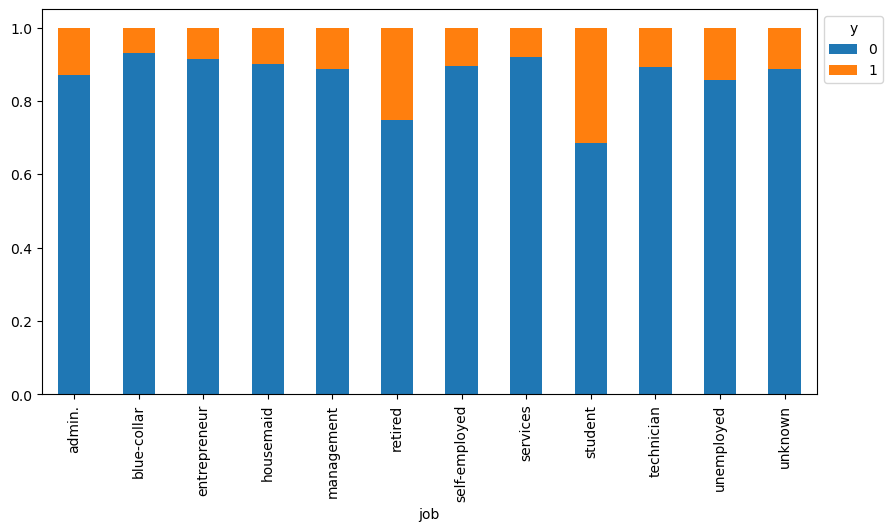

In [17]:
a.plot(kind='bar',stacked=True,figsize=[10,5])
plt.legend(title='y',bbox_to_anchor=(1.0,1.0))
plt.show()

#### Customers of working age, primarily from administrative, blue-collar, and technician roles, make up the majority of the dataset. Nonetheless, blue-collar jobs have the lowest success rates, while retirees and students have higher subscription rates.

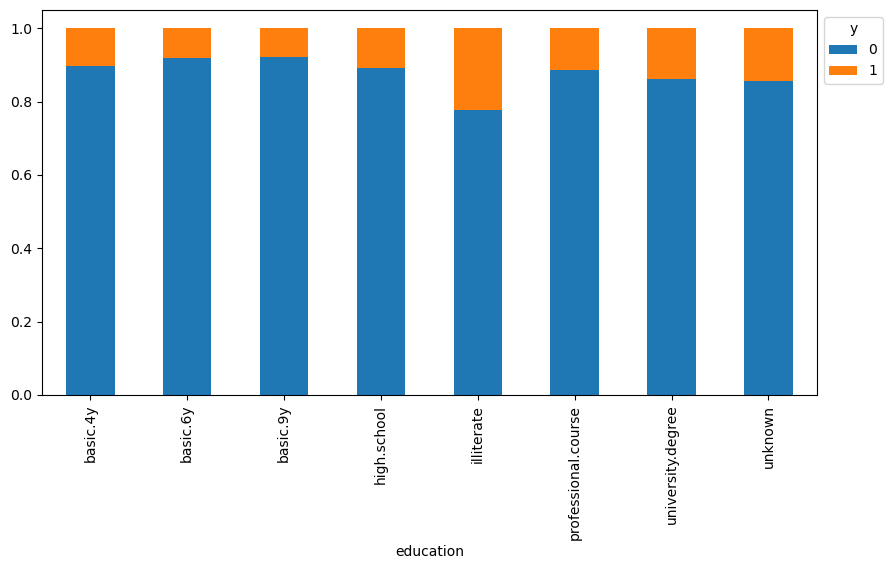

In [18]:
b.plot(kind='bar',stacked=True,figsize=[10,5])
plt.legend(title='y',bbox_to_anchor=(1.0,1.0))
plt.show()

#### The most common educational levels are basic and high school, but higher subscription proportions are found in the illiterate, university-degree, and unknown groups, suggesting that education and employment are important predictors.


In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [20]:
D=df[['age','campaign','previous','euribor3m','y']].corr()
D

,age,campaign,previous,euribor3m,y
age,1.000000,0.004594,0.024365,0.010767,0.030399
campaign,0.004594,1.000000,-0.079141,0.135133,-0.066357
previous,0.024365,-0.079141,1.000000,-0.454494,0.230181
euribor3m,0.010767,0.135133,-0.454494,1.000000,-0.307771
y,0.030399,-0.066357,0.230181,-0.307771,1.000000


### Que:Correlation Analysis Using Heatmap

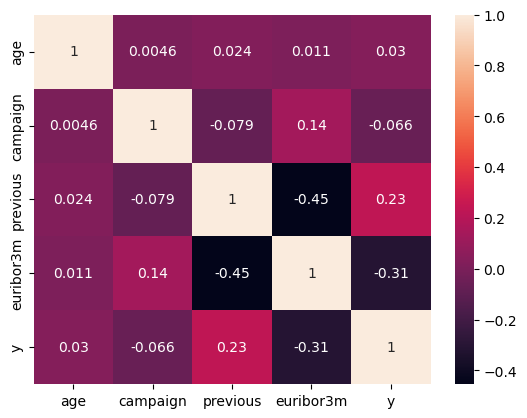

In [21]:
sb.heatmap(D,annot=True)
plt.show()

#### The subscription outcome (y) has a weakly positive correlation with prior contacts and a negative correlation with euribor3m, indicating that lower interest rates are associated with higher subscriptions. There is little correlation between campaign frequency and age, suggesting little direct influence.

##  CLIENT PROFILE ANALYSIS

### Que:Subscription Distribution by Job Type & by Education Level

In [22]:
c=df.groupby('job')['y'].value_counts(normalize=True).unstack()
c

y,0,1
job,,
admin.,0.870274,0.129726
blue-collar,0.931057,0.068943
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747674,0.252326
self-employed,0.895144,0.104856
services,0.918619,0.081381
student,0.685714,0.314286


In [23]:
d=df.groupby('education')['y'].value_counts(normalize=True).unstack()
d

y,0,1
education,,
basic.4y,0.897510,0.102490
basic.6y,0.917976,0.082024
basic.9y,0.921754,0.078246
high.school,0.891645,0.108355
illiterate,0.777778,0.222222
professional.course,0.886515,0.113485
university.degree,0.862755,0.137245
unknown,0.854997,0.145003


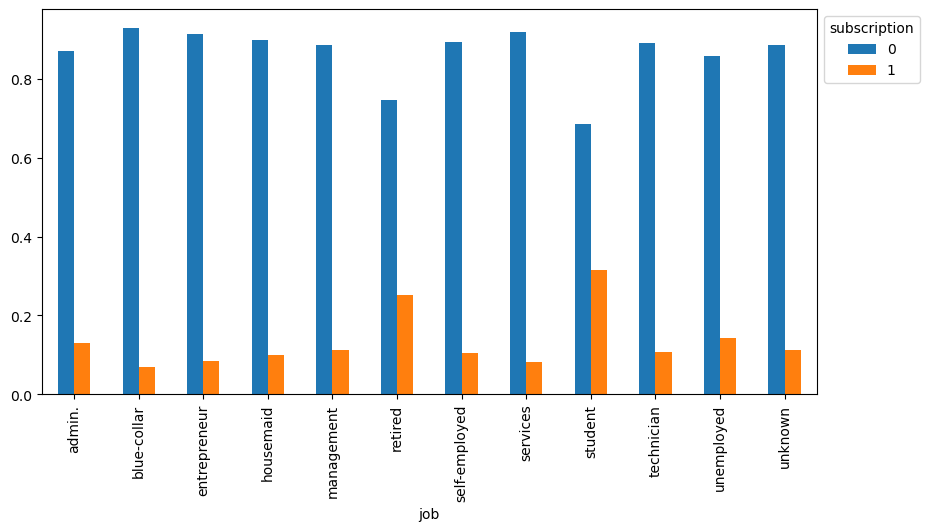

In [24]:
c.plot(kind='bar',figsize=[10,5])
plt.legend(title='subscription',bbox_to_anchor=(1.0,1.0))
plt.show()

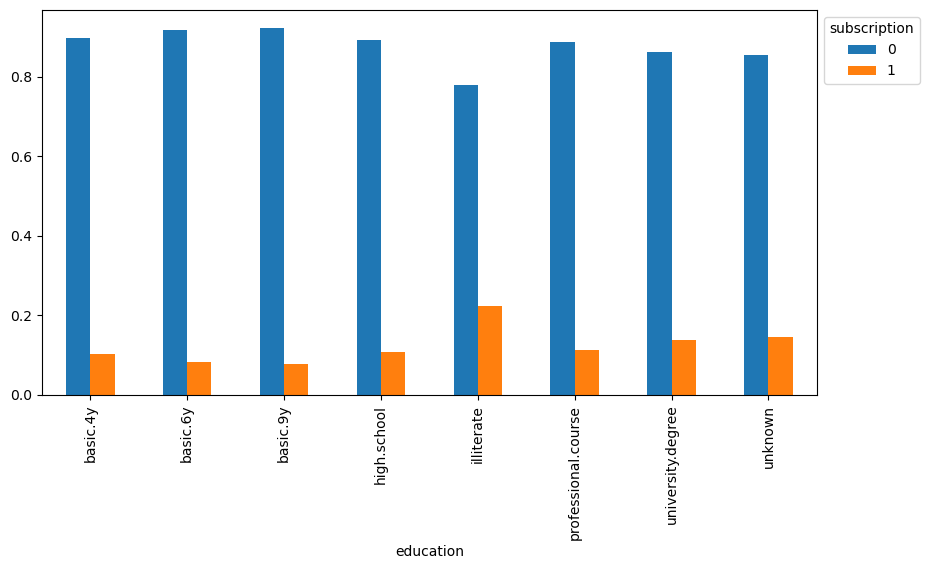

In [25]:
d.plot(kind='bar',figsize=[10,5])
plt.legend(title='subscription',bbox_to_anchor=(1.0,1.0))
plt.show()

#### Job, marital status, and educational attainment all influence subscription decisions; retirees and students are more likely to subscribe, whereas those in blue-collar jobs have less success. Customers who are single have higher subscription rates than those who are married or divorced, and those with university degrees and illiteracy have higher subscription rates than those with only a basic education.

## CAMPAIGN EFFECTIVENESS

### Que:Call Duration Distribution Using Box Plot

In [26]:
e=df.groupby('y')['duration'].mean()
e

y
0    220.844807
1    553.191164
Name: duration, dtype: float64

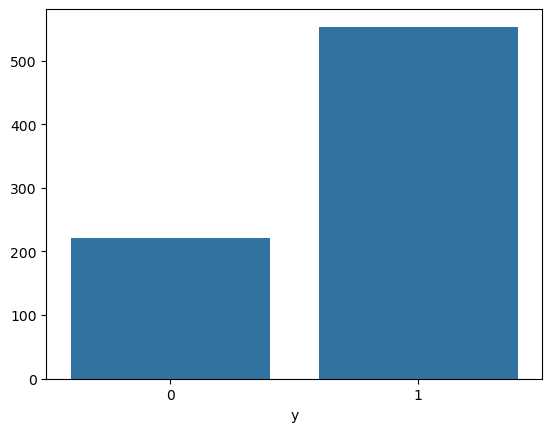

In [27]:
sb.barplot(x=e.index,y=e.values)
plt.show()

#### Yes, call duration has a strong impact on subscription success. Customers who subscribed (y = 1) had a much longer average call duration) compared to those who did not subscribe. This indicates that longer, more engaging calls significantly increase the likelihood of a successful subscription.

### Que:Contact Method Analysis

In [28]:
f=df.groupby('contact')['y'].value_counts(normalize=True).unstack()*100
f

y,0,1
contact,,
cellular,85.262393,14.737607
telephone,94.768679,5.231321


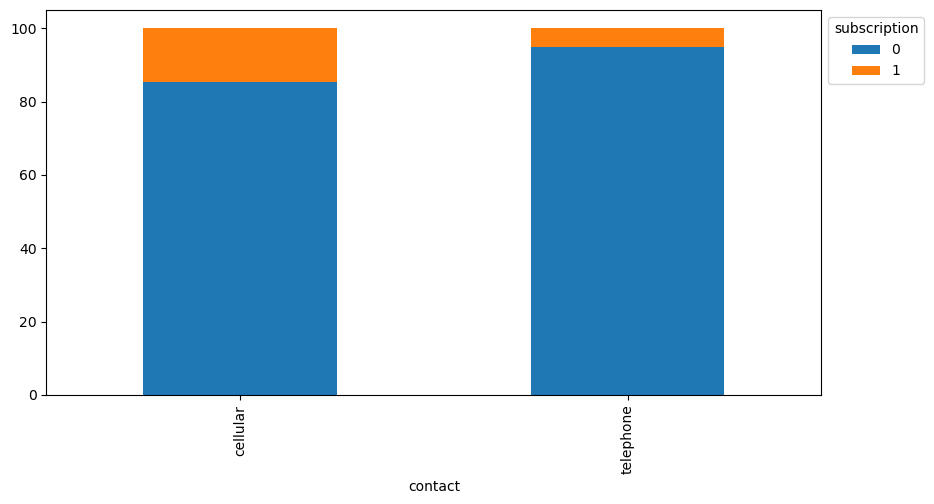

In [29]:
f.plot(kind='bar',stacked=True,figsize=[10,5])
plt.legend(title='subscription',bbox_to_anchor=(1.0,1.0))
plt.show()

#### Cellular contact is significantly more effective than telephone calls. About 14.7% of customers contacted via cellular subscribed, compared to only 5.2% via telephone, indicating that cellular outreach leads to higher engagement and conversion rates.

### Que:Campaign Contacts by Subscription Status

In [30]:
df.groupby('y')['campaign'].mean()

y
0    2.633085
1    2.051724
Name: campaign, dtype: float64

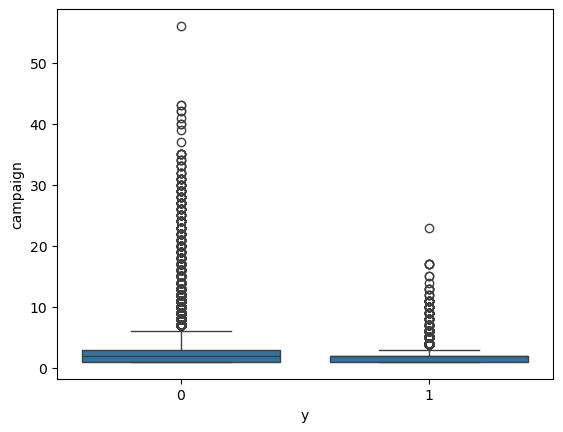

In [31]:
sb.boxplot(x=df.y,y=df.campaign)
plt.show()

#### Call duration is a key factor influencing subscription success.
#### Calls that resulted in a “yes” have a much higher average duration compared to “no” responses.
#### Longer, engaging conversations increase the likelihood of successful subscriptions and higher conversion rates.

## PREVIOUS CAMPAIGN IMPACT

### Que:Comparison of Subscription Outcomes Using Bar Chart

In [32]:
g=df.groupby('poutcome')['y'].value_counts(normalize=True).unstack()*100
g

y,0,1
poutcome,,
failure,85.771402,14.228598
nonexistent,91.167787,8.832213
success,34.887109,65.112891


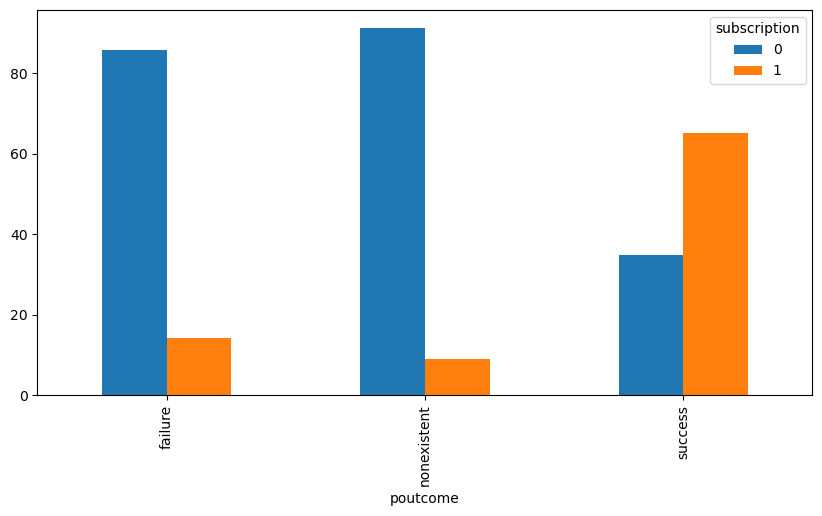

In [33]:
g.plot(kind='bar',figsize=[10,5])
plt.legend(title='subscription',bbox_to_anchor=(1.0,1.0))
plt.show()

#### Customers with previous campaign success are far more likely to subscribe again, while those with failed or no prior outcomes show low subscription rates. This makes past campaign outcome a strong predictor of future subscriptions.

### Que:Subscription Rate by Previous Contacts

In [34]:
h=df.groupby('previous')['y'].value_counts(normalize=True).unstack()*100
h

y,0,1
previous,,
0,91.167787,8.832213
1,78.798509,21.201491
2,53.580902,46.419098
3,40.740741,59.259259
4,45.714286,54.285714
5,27.777778,72.222222
6,40.000000,60.000000
7,100.000000,NaN


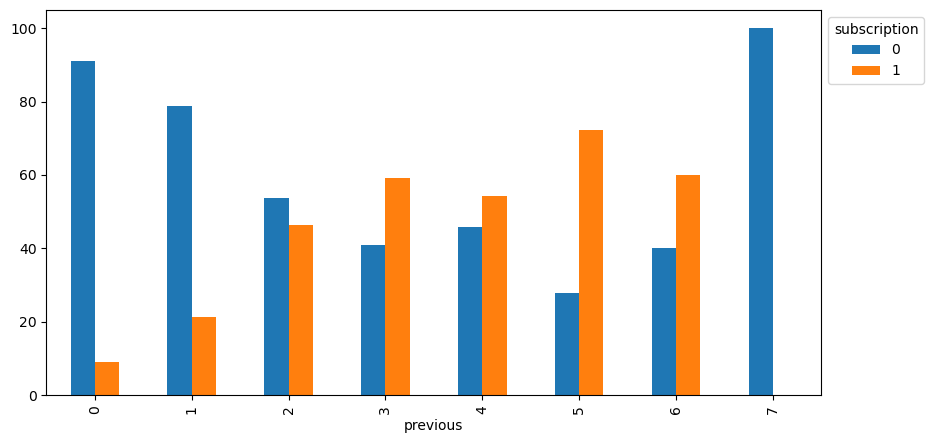

In [35]:
h.plot(kind='bar',figsize=[10,5])
plt.legend(title='subscription',bbox_to_anchor=(1.0,1.0))
plt.show()

#### Clients who had prior contact show a higher likelihood of subscription compared to those with no previous interactions. As the number of past contacts increases, the success rate generally improves, indicating that prior engagement positively influences conversion.

## TEMPORAL ANALYSIS

### Que:Month-wise Subscription Trend Using Line Plot

In [36]:
i=df.groupby('month')['y'].value_counts(normalize=True).unstack()*100
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
i = i.reindex(month_order)
i

y,0,1
month,,
jan,NaN,NaN
feb,NaN,NaN
mar,49.450549,50.549451
apr,79.521277,20.478723
may,93.565255,6.434745
jun,89.488530,10.511470
jul,90.953443,9.046557
aug,89.397863,10.602137
sep,55.087719,44.912281


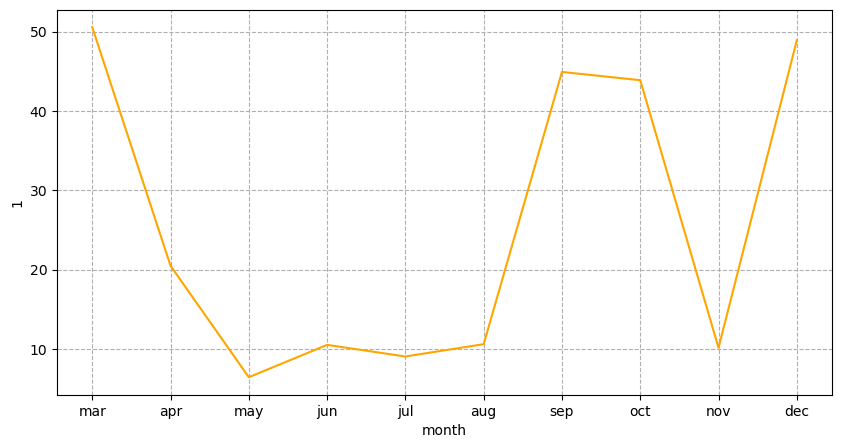

In [37]:
plt.figure(figsize=[10,5])
sb.lineplot(x=i.index, y=i[1],color='orange')
plt.grid(linestyle='--')
plt.show()

#### Subscription rates are highest in March, September, October, and December. These months show clear peaks compared to the rest of the year, indicating stronger customer response during these periods.

### Que:Subscription Rate by Day of the Week

In [38]:
k=df.groupby('day_of_week')['y'].value_counts(normalize=True).unstack()*100
k

y,0,1
day_of_week,,
fri,89.191261,10.808739
mon,90.051680,9.948320
thu,87.881248,12.118752
tue,88.220025,11.779975
wed,88.332924,11.667076


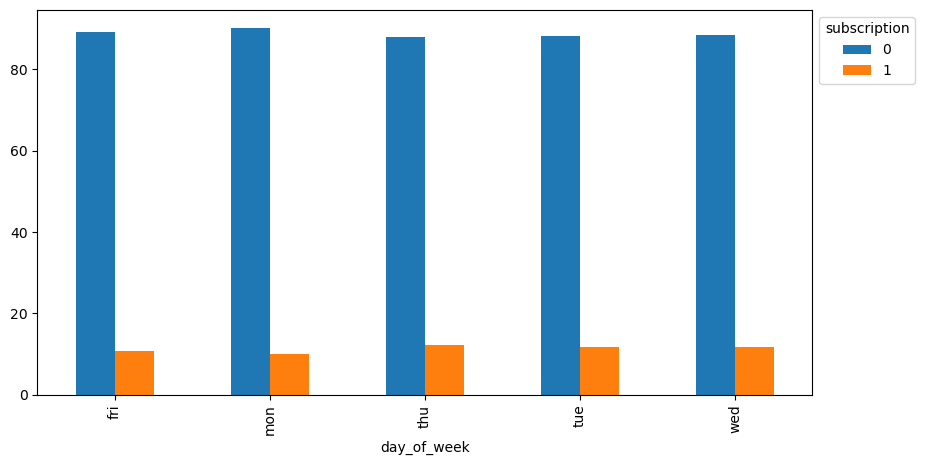

In [39]:
k.plot(kind='bar',figsize=[10,5])
plt.legend(title='subscription',bbox_to_anchor=(1.0,1.0))
plt.show()

#### Subscription success remains fairly consistent across all days of the week, with only minor variations. This suggests that the day of the week has little to no significant impact on subscription outcomes.